In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [4]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
    'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 
    'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 
    'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 
    'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 
    'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 
    'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 
    'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 
    'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
    'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 
    'telephone', 'television', 'tiger', 'tractor', 'train', 
    'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 
    'willow_tree', 'wolf', 'woman', 'worm'
]

In [5]:
X_train = x_train/255.0
X_test = x_test /255.0
y_train = to_categorical(y_train,num_classes = 100)
y_test = to_categorical(y_test ,num_classes = 100)

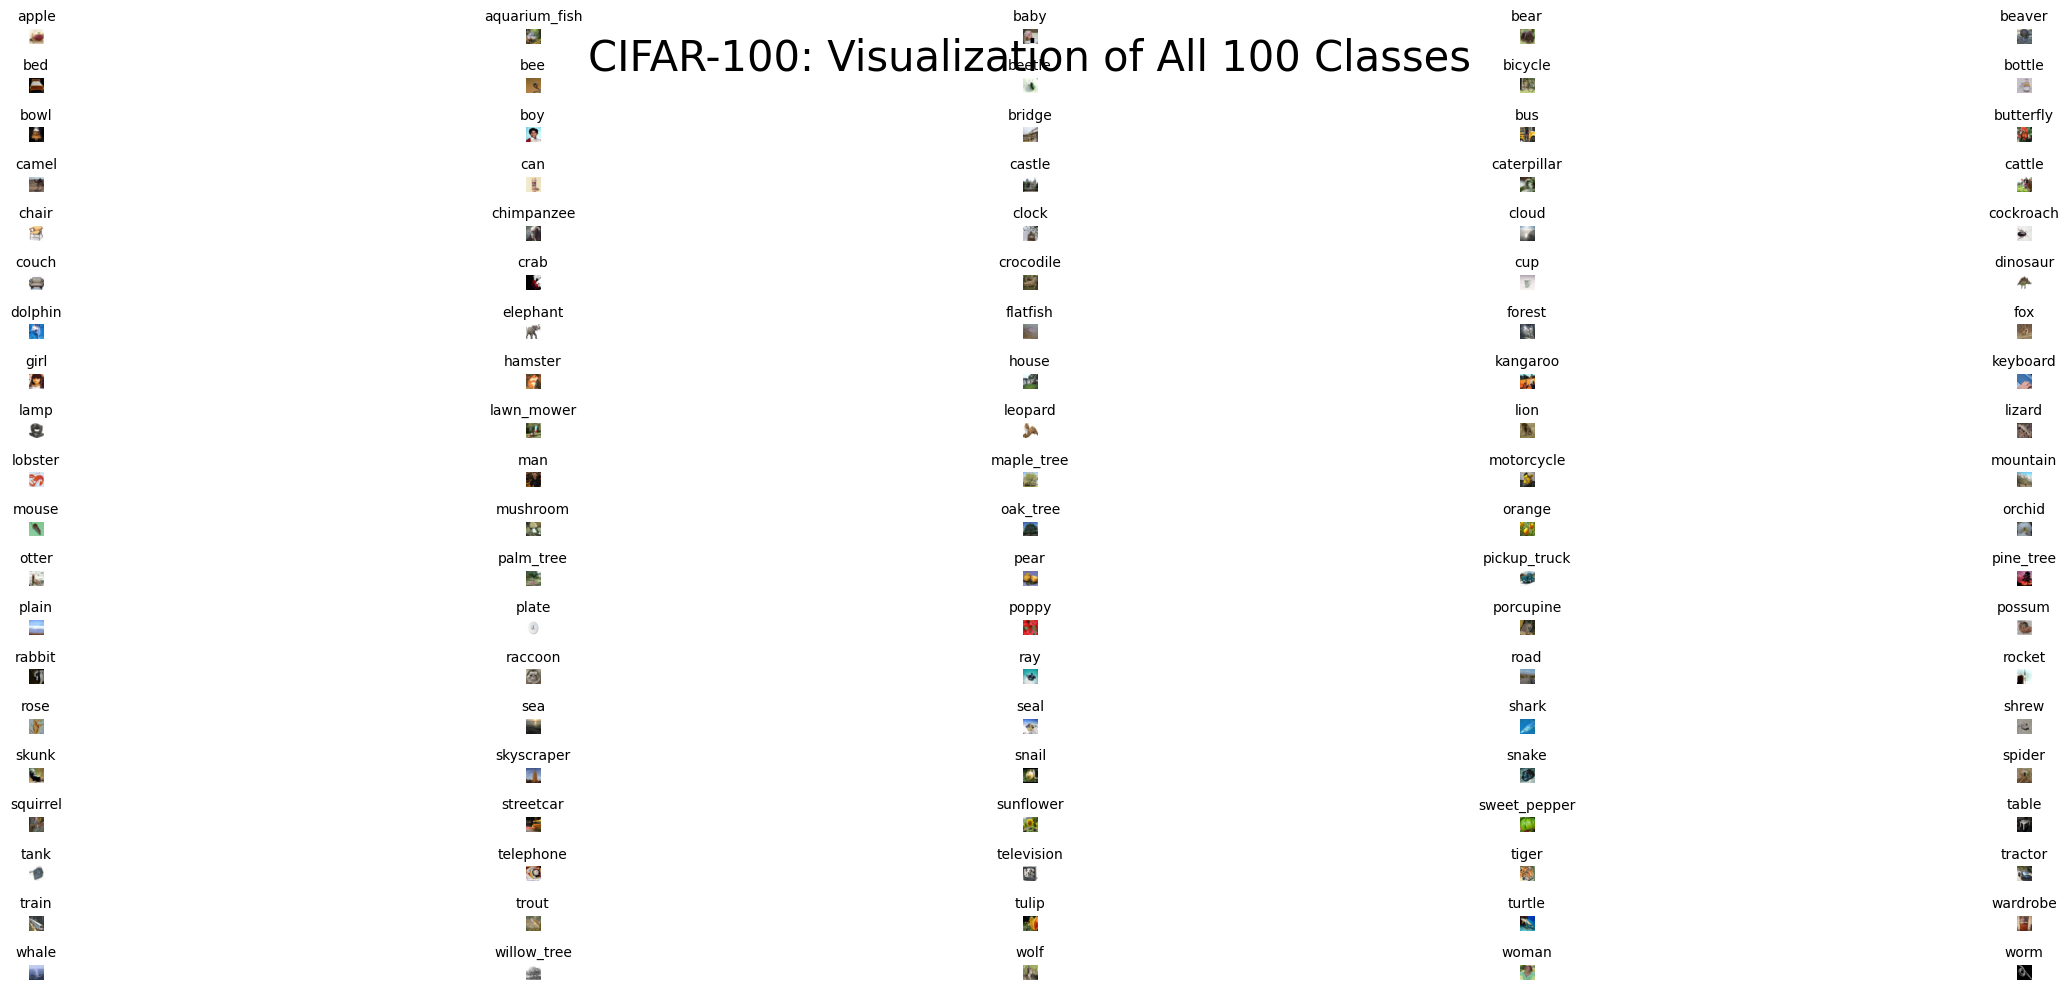

In [6]:
plt.figure(figsize=(25, 50))  # Adjusted for larger image size

# For each of the 100 classes, plot 1 sample image
for class_index, class_label in enumerate(range(100)):  # 100 classes in CIFAR-100
    # Find one index in y_train_oh with this class
    indices = np.where(np.argmax(y_train, axis=1) == class_label)[0]
    
    # Plot one image per class
    plt.subplot(100, 5, class_index + 1)  # 100 rows, 5 columns
    plt.imshow(X_train[indices[0]])  # Show first image for this class
    plt.title(class_names[class_index], fontsize=10)  # Increased font size for clarity
    plt.axis('off')

plt.suptitle("CIFAR-100: Visualization of All 100 Classes", fontsize=30)  # Increased title font size
plt.tight_layout()
plt.show()

In [17]:
model = Sequential([
    # Conv Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Conv Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Conv Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')  # CIFAR-100 has 100 classes
])

In [19]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,300,004 (12.59 MB)

 Trainable params: 3,297,188 (12.58 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [20]:
optimizer = Adam(learning_rate=0.001)  # Default learning rate is 0.001
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
datagen = ImageDataGenerator(
    rotation_range=15,  # Random rotation
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift

    zoom_range=0.1,  # Zoom
    horizontal_flip=True,  # Horizontal flip
    fill_mode='nearest'  # Filling missing pixels after transformation
)

# Fit the model with augmented data
datagen.fit(X_train)


In [22]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=1, factor=0.5, min_lr=1e-5)

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [25]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler, early_stopping],
    verbose = 1
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.0667 - loss: 5.5661 - val_accuracy: 0.1547 - val_loss: 4.5669 - learning_rate: 0.0010
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.1827 - loss: 4.4012 - val_accuracy: 0.2905 - val_loss: 3.8703 - learning_rate: 0.0010
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2517 - loss: 4.0548 - val_accuracy: 0.3054 - val_loss: 3.8495 - learning_rate: 0.0010
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2924 - loss: 3.9394 - val_accuracy: 0.3330 - val_loss: 3.8108 - learning_rate: 0.0010
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3199 - loss: 3.9019 - val_accuracy: 0.3240 - val_loss: 4.0739 - learning_rate: 0.0010
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3766 - loss: 3.5764 - val_accuracy: 0.4825 - val_loss: 2.8992 - learning_rate: 5.0000e-04
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - ac

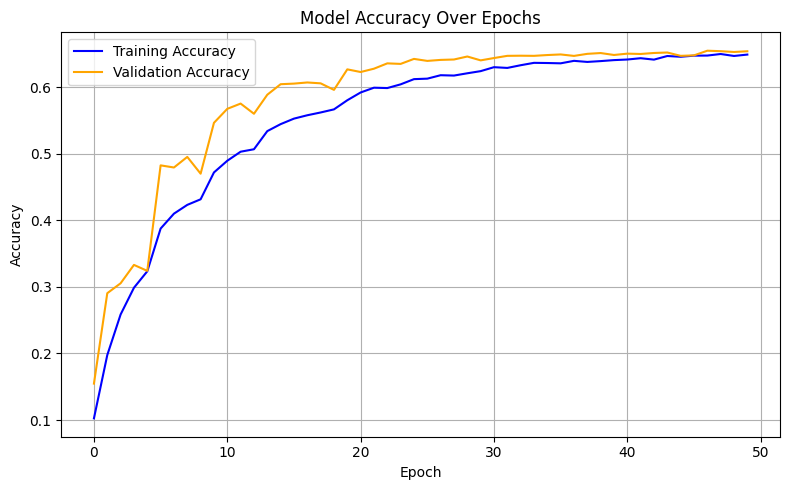

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6542 - loss: 1.6765
Test Accuracy: 65.28%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


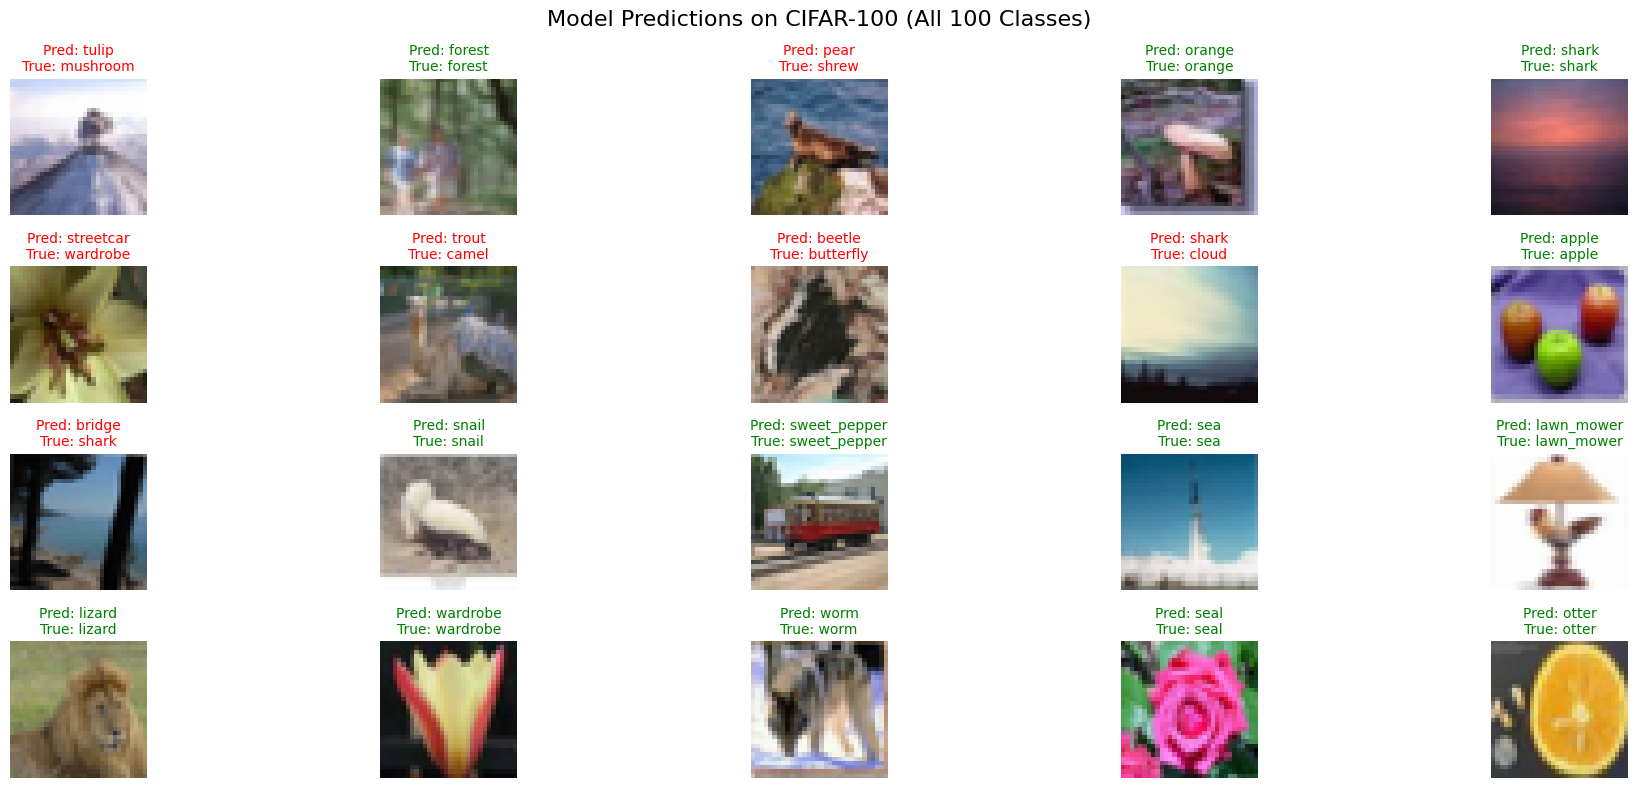

In [28]:
fine_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'keyboard', 'lamp',
    'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mouse', 'mushroom',
    'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate',
    'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar',
    'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Predict the first 20 test samples
pred_probs = model.predict(X_test[:20])
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test[:20], axis=1)

# Plot predictions
plt.figure(figsize=(20, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(
        f"Pred: {fine_label_names[pred_classes[i]]}\nTrue: {fine_label_names[true_classes[i]]}",
        color="green" if pred_classes[i] == true_classes[i] else "red",
        fontsize=10
    )
    plt.axis('off')

plt.suptitle("Model Predictions on CIFAR-100 (All 100 Classes)", fontsize=16)
plt.tight_layout()
plt.show()